In [1]:
import os, sys

import numpy as np
import pandas as pd
import random
import tensorflow as tf

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from utils.utils import Create_Similarity_Model

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from mpl_toolkits import mplot3d
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib

sns.set_style('whitegrid')
sns.set_context("talk")

2023-07-25 09:48:31.505306: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-25 09:48:31.505334: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
n_nonsimilar = 2
n_similar = 1

In [3]:
possible_re_tau = np.linspace(start = 10, stop = 100, num = 100)
possible_he = np.linspace(start = 10, stop = 100, num = 100)
#possible_r = np.linspace(start = 0.1, stop = 0.99, num = 100)
Re_tau = []
He_ = []
R_ =[]
Y_ = []
U_ = []
dic_x = {}
dic_y = {}

for re_tau in possible_re_tau:
    for he in possible_he:
        possible_r = np.linspace(start = he / (re_tau**2), stop = 1, num = 100)
        for r in possible_r:
            u_ = ((re_tau / 4) * (1 - (r ** 2))) - ((1 - r) * (he / re_tau) / 2)
            if u_ > 0:
                U_.append(u_)
                R_.append(r)
                #Y_.append(y_)
                He_.append(he)
                Re_tau.append(re_tau)

# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")

# surf = ax.scatter(np.array(R_), np.array(He_) / (np.array(Re_tau) ** 2), np.array(U_) / np.array(Re_tau))
# plt.show()

c = list(zip(R_, He_, Re_tau, U_))
random.shuffle(c)
R_, He_, Re_tau, U_= zip(*c)

dic_x['r'] = R_
dic_x['He'] = He_
dic_x['Re_tau'] = Re_tau
dic_y['u+'] = U_


nonsimilar_keys = ['r', 'He']

xtrain_df = pd.DataFrame.from_dict(dic_x)

xtrain = np.log(xtrain_df.values)
ytrain = np.log(pd.DataFrame.from_dict(dic_y))

In [4]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 1                       # Number of model fits we will try to perform
n_epochs_initial = 10          # Number of epochs we will train inside the loop
n_epochs_final = 10         # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
#model.summary()
model.compile(loss = loss, optimizer = optimizer)
model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 1)

# while successfull_tries < n_fits:
#     model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
#     model.compile(loss = loss, optimizer = optimizer)
#     model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
#     current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
#     print("current loss:" + str(current_loss))
#     if current_loss < 12000:
#         successfull_tries += 1
#         model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
#         good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
#         models.append(model)
#         print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
#         if good_loss < best_loss:
#             best_model = model
#             best_loss = good_loss

Epoch 1/10


2023-07-25 09:48:44.446978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-25 09:48:44.447216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-25 09:48:44.447268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-07-25 09:48:44.447315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-07-25 09:48:44.447359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

30935/30935 [==============================] - 47s 2ms/step - loss: 0.2143
Epoch 2/10
30935/30935 [==============================] - 47s 2ms/step - loss: 0.0053
Epoch 3/10
30935/30935 [==============================] - 47s 2ms/step - loss: 0.0045
Epoch 4/10
30935/30935 [==============================] - 45s 1ms/step - loss: 0.0041
Epoch 5/10
12548/30935 [===========>..................] - ETA: 28s - loss: 0.0039

KeyboardInterrupt: 

In [5]:
good_loss = model.evaluate(xtrain, ytrain, verbose = 1)

30935/30935 [==============================] - 25s 788us/step - loss: 0.0017


In [13]:
similarity_exponents = model.get_layer('similarity_layer').weights[0][0].numpy()

print(similarity_exponents)

# for j in range(n_nonsimilar):
#     print('Exponents multiplicating inside the function for model in: ' + nonsimilar_keys[j] + ': ' + str(similarity_exponents[j]))

multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
print(multiplication_exponents)

[ 8.7694213e-04 -2.1817944e+00]
[0.9887702]


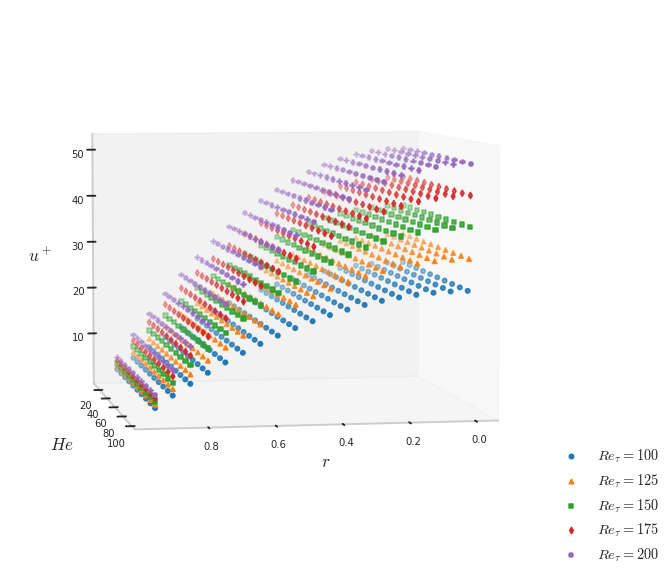

In [102]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(projection='3d')

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']

possible_re_tau = np.linspace(start = 100, stop = 200, num = 5)
possible_he = np.linspace(start = 10, stop = 100, num = 10)
Re_tau = []
He_ = []
R_ =[]
U_ = []

j = 0

for re_tau in possible_re_tau:
    He_ = []
    R_ =[]
    U_ = []
    for he in possible_he:
        possible_r = np.linspace(start = he / (re_tau**2), stop = 1, num = 20)
        for r in possible_r:
            u_ = ((re_tau / 4) * (1 - (r ** 2))) - ((1 - r) * (he / re_tau) / 2)
            if u_ > 0:
                U_.append(u_)
                R_.append(r)
                He_.append(he)
    
    ax.scatter(R_, He_, U_, color = colors[j], marker = markers[j], label = r'$Re_\tau= $'+r'${:.0f}$'.format(re_tau))
    ax.grid(False)

    j += 1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'x-large', stretch = 'ultra-condensed')

ax.legend(bbox_to_anchor=(1, 0.2), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.set_xlabel(r"$r$", size = 'xx-large', labelpad=10)
ax.set_ylabel(r"$He$", size = 'xx-large', labelpad=20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$u^+$", size = 'xx-large', labelpad=20, rotation = 0)
ax.view_init(elev=5, azim=80)

for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)

plt.savefig('Figures/Example Data for Bingham.pdf', format='pdf', dpi=1200)
plt.show()


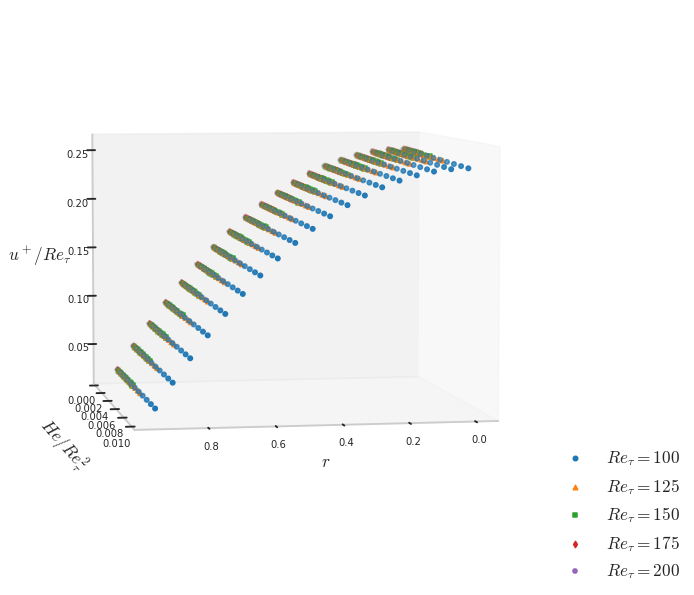

In [103]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(projection='3d')

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']

possible_re_tau = np.linspace(start = 100, stop = 200, num = 5)
possible_he = np.linspace(start = 10, stop = 100, num = 10)
Re_tau = []
He_ = []
R_ =[]
U_ = []

j = 0

for re_tau in possible_re_tau:
    He_ = []
    R_ =[]
    U_ = []
    for he in possible_he:
        possible_r = np.linspace(start = he / (re_tau**2), stop = 1, num = 20)
        for r in possible_r:
            u_ = ((re_tau / 4) * (1 - (r ** 2))) - ((1 - r) * (he / re_tau) / 2)
            if u_ > 0:
                U_.append(u_ / re_tau)
                R_.append(r)
                He_.append(he / (re_tau**2))
    
    ax.scatter(R_, He_, U_, color = colors[j], marker = markers[j], label = r'$Re_\tau= $'+r'${:.0f}$'.format(re_tau))
    ax.grid(False)

    j += 1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax.legend(bbox_to_anchor=(1, 0.2), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.set_xlabel(r"$r$", size = 'xx-large', labelpad=10)
ax.set_ylabel(r"$He/Re_\tau^2$", size = 'xx-large',labelpad=20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$u^+/Re_\tau$", size = 'xx-large', labelpad=20, rotation=0)
ax.view_init(elev=5, azim=80)

for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)

plt.savefig('Figures/Collapsed Data for Bingham.pdf', format='pdf', dpi=1200)
plt.show()

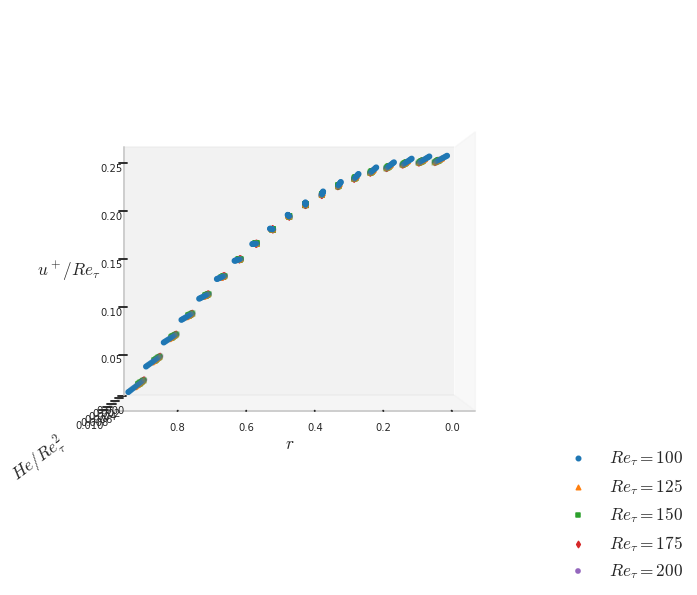

In [106]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(projection='3d')

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']

possible_re_tau = np.linspace(start = 100, stop = 200, num = 5)
possible_he = np.linspace(start = 10, stop = 100, num = 10)
Re_tau = []
He_ = []
R_ =[]
U_ = []

j = 0

for re_tau in possible_re_tau:
    He_ = []
    R_ =[]
    U_ = []
    for he in possible_he:
        possible_r = np.linspace(start = he / (re_tau**2), stop = 1, num = 20)
        for r in possible_r:
            u_ = ((re_tau / 4) * (1 - (r ** 2))) - ((1 - r) * (he / re_tau) / 2)
            if u_ > 0:
                U_.append(u_ / re_tau)
                R_.append(r)
                He_.append(he / (re_tau**2))
    
    ax.scatter(R_, He_, U_, color = colors[j], marker = markers[j], label = r'$Re_\tau= $'+r'${:.0f}$'.format(re_tau))
    ax.grid(False)

    j += 1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax.legend(bbox_to_anchor=(1, 0.2), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.set_xlabel(r"$r$", size = 'xx-large', labelpad=10)
ax.set_ylabel(r"$He/Re_\tau^2$", size = 'xx-large',labelpad=40)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$u^+/Re_\tau$", size = 'xx-large', labelpad=30, rotation=0)
ax.view_init(elev=0, azim=90)

for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)

plt.savefig('Figures/Collapsed Data for Bingham 2.pdf', format='pdf', dpi=1200)
plt.show()

In [2]:
dicio = {"a": 1, "b": 2}
chaves = list(dicio.keys())
print(chaves)

['a', 'b']
